In [1]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
%load_ext autoreload
%autoreload 2

### Создадим схему для следующей решетки

In [36]:
g = nx.Graph()

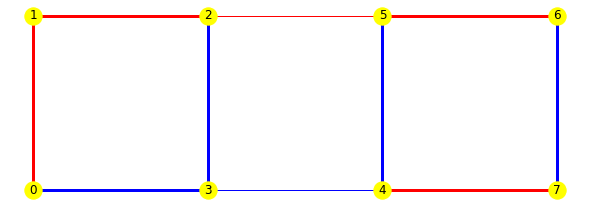

In [45]:
g.add_nodes_from(
    [
    (0, {'pos': (0, 0), 'label': 0}),
    (1, {'pos': (0, 1), 'label': 1}),
    (2, {'pos': (1, 1), 'label': 2}),
    (3, {'pos': (1, 0), 'label': 3}),
    (4, {'pos': (2, 0), 'label': 4}),
    (5, {'pos': (2, 1), 'label': 5}),
    (6, {'pos': (3, 1), 'label': 6}),
    (7, {'pos': (3, 0), 'label': 7}),
    ]
    )
g.add_edges_from(
[
    (0, 1),
    (1, 2),
    (2, 3),
    (0, 3),
    (5, 6),
    (6, 7),
    (7, 4),
    (4, 5),
    (2, 5),
    (3, 4)
])

pos=nx.get_node_attributes(g,'pos')
labels=nx.get_node_attributes(g,'label')
nx.draw(g,
        pos,
        labels=labels,
        node_color='yellow',
        width=[3, 3, 3, 3, 1, 1, 3, 3],
        edge_color=['blue'])
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.axis('scaled')
plt.show()

In [ ]:
square_interactions1 = {(i, (i + 1) % 4): 1 for i in range(4)}
square_interactions2 = {(i + 4, (i + 1) % 4 + 4): 1 for i in range(4)}
connections = {(2, 5): 1, (3, 4): 1}
interactions = {**square_interactions1, **square_interactions2, **connections}

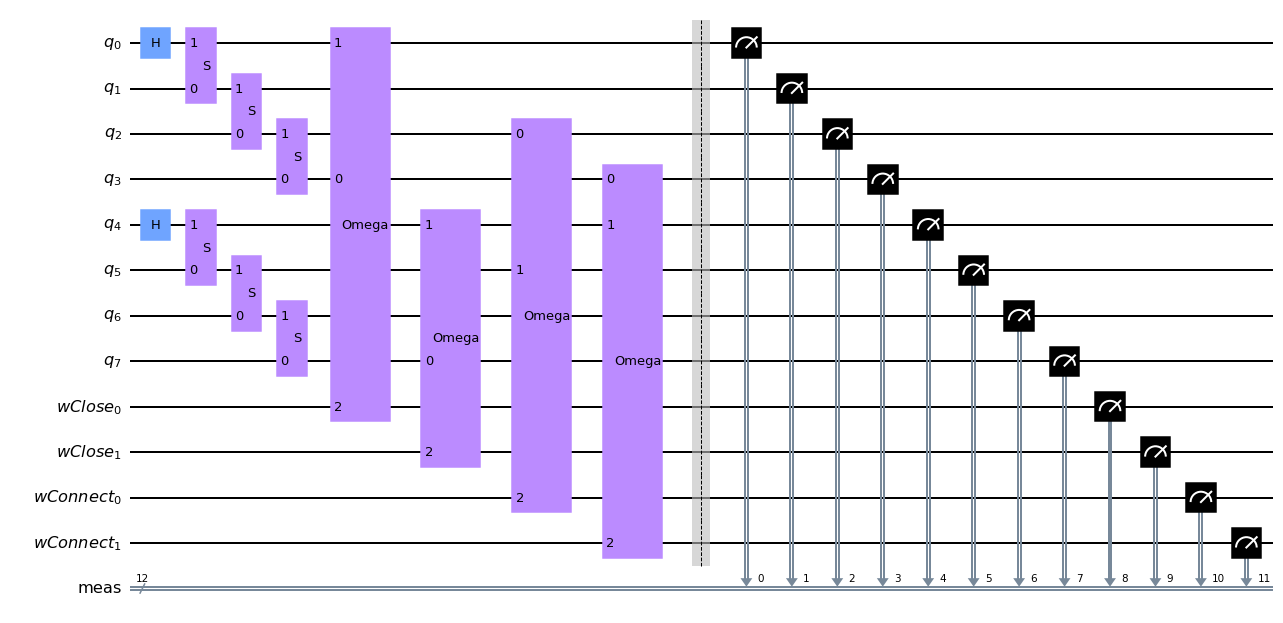

In [3]:
circ = utils.lattice_curcuit([square_interactions1, square_interactions2], connections)
circ.measure_all()
circ.draw('mpl')

In [24]:
backend = qiskit.BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circ, backend, shots=65536)
pre_result = job.result().get_counts()
result = utils.process_lattice_result(pre_result, 4)

In [37]:
total_good = sum(result.values())
comparison = [value/total_good - utils.Pr(utils.spins_from_string01(key[::-1]), interactions)\
              for key, value in result.items()]

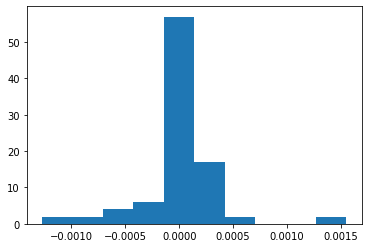

In [38]:
plt.hist(comparison)
plt.show()

In [22]:
job.result()

Result(backend_name='qasm_simulator', backend_version='2.0.0', qobj_id='f6bb6014-5de2-4ced-b133-c3f4c64b62cd', job_id='cd9cec1e-cbee-4772-9bb0-a9bde217cea0', success=True, results=[ExperimentResult(shots=20000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0xa07': 205, '0x72f': 27, '0xf00': 1405, '0xe00': 212, '0xd7f': 168, '0xd80': 190, '0xfff': 1355, '0x9cf': 28, '0xeb7': 1, '0x4ee': 29, '0x3f0': 1398, '0x28f': 5, '0x170': 181, '0x31': 28, '0x700': 195, '0x8f8': 32, '0x150': 2, '0xf7': 6, '0x7f0': 173, '0xd1f': 30, '0xdff': 193, '0x6f7': 169, '0x270': 3, '0x411': 26, '0xefc': 212, '0x30f': 1357, '0x7': 4, '0x9fb': 5, '0x2f3': 185, '0x130': 181, '0xbf0': 202, '0xe8': 27, '0x413': 36, '0xeff': 193, '0x603': 30, '0x878': 24, '0x7ff': 209, '0x488': 25, '0x5ff': 27, '0xf18': 2, '0x590': 1, '0x3b0': 32, '0x6f1': 29, '0xaf8': 194, '0x20c': 179, '0x223': 1, '0x57f': 29, '0x4ff': 5, '0x9c0': 33, '0xe0e': 4, '0x100': 6, '0x7d0': 32, '0x2f0': 190, '0x20e': 19